## Descriptive Statistics

- mean: np.mean(data)
- median: np.median(data)
- mode: np.mode(data)
- variance: np.var(data)
- std div: np.std(data)
- range: np.ptp(data)
- stats.describe(data)
- 75th percent: np.percentile(data, 75)
- quantile: np.quantile(data, [0.25, 0.5, 0.75])
- coefficient of variation: stats.variation(data)

## Probability Distribution

- normal disribution: stats.norm.pdf(x, loc=0, scale=1) or stats.norm.cdf(x, loc=0, scale=1)

## Hypothesis Testing

- paired t-test: stats.ttest_rel(data1, data2)
- one way ANOVA: stats.f_oneway(data1, data2, data3)
- kruskal-wallis H-test: stats.kruskal(data1, data2, data3)

## Multivariate Analysis

- PCA: from sklearn.decomposition import PCA; PCA().fit_transform(X)
- Canonical correlation analysis: from sklearn.cross_decomposition import CCA; CCA().fit(X, Y).transform(X, Y)

## Time Series Analysis

- autocorrelation: stats.autocorr(data)

## Cluster Analysis

- k-mean clustering: from sklearn.cluster import KMeans; KMeans(n_clusters=k).fit(X)
- Hierarchical clustering: from sklearn.cluster.hierarchy import linkage; linkage(X, method='ward')


In [7]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io, base64, json

file = '/home/aniket-yadav/WORKSPACE/WebProjects/.visenv/Visualizer/staticfiles/Data/ColorectalCancer.xlsx'
df = pd.read_excel(file, sheet_name='ColorectalCancer')
spcCent = df["Specialized Centers"].astype(float).to_list() # sample list out a column

df

,Country,Specialized Centers,Genetic & Molecular Testing Infrastructure (1–5),Treatment Access,Research Funding,Awareness Campaigns,Survival Rates,Early Detection,Palliative Care,KRAS mutations,...,Microsatellite Instability (MSI) / Mismatch Repair Deficiency (dMMR),PIK3CA mutations,Clinical Guideline Implementation (1-5),Feasibility of Integration (1-5),Adoption of Int'l Guidelines (1-5),Engagement with Updates (1-3),ESMO Guidelines Implementation (1-5),Reimbursement Framework,No-cost Access,Colorectal Cancer Screening
0,South Africa,3,3,3,3,3,2,3,2,60,...,10,10,4,3,3,2,3,2,2,No national program; limited access to colono...
1,Kenya,2,2,1,1,1,1,1,1,30,...,5,5,2,2,2,1,1,1,1,No national program; limited availability of s...
2,Nigeria,2,2,1,1,1,1,1,1,30,...,5,5,2,2,2,1,1,1,1,No national screening; awareness is low; lim...
3,Egypt,3,3,2,2,2,2,2,2,50,...,10,10,3,3,3,2,2,2,2,Opportunistic screening in urban centers; no o...
4,Morocco,3,3,2,2,2,2,2,2,45,...,5,5,2,2,2,1,1,2,2,Pilot screening programs in some regions using...
5,Algeria,2,2,2,2,2,2,2,2,45,...,5,5,2,2,2,1,1,2,2,No formal national screening program; opportun...
6,Ethiopia,1,1,1,1,1,1,1,1,20,...,1,1,1,1,1,1,1,1,1,No national screening; highly limited infrastr...
7,India,4,3,3,3,3,3,3,3,40,...,5,5,3,3,3,2,2,1,1,No national program; opportunistic screening w...
8,Japan,5,5,4,4,5,5,4,5,20,...,5,3,4,4,3,2,3,2,2,National screening using annual FOBT starting ...
9,South Korea,5,5,4,4,5,5,4,4,25,...,10,10,4,4,4,2,3,3,3,National Cancer Screening Program: annual FIT ...


In [2]:

def get_descriptive_statistics(df, alter=2):
    """
    Calculate descriptive statistics for each column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    
    Returns:
    pd.DataFrame: DataFrame containing the descriptive statistics.
    """
    datavals = {}
    for i in range(df.shape[1]-alter):
        data = df.iloc[:, (alter-1)+i].astype(float).to_list()
        datavals[df.iloc[:, (alter-1)+i].name] = {
            "mean": np.mean(data).__float__(),
            "median": np.median(data).__float__(),
            "std": np.std(data).__float__(),
            "variance": np.var(data).__float__(),
            "min": np.min(data).__float__(),
            "max": np.max(data).__float__(),
            "skew": stats.skew(data).__float__(),
            "kurtosis": stats.kurtosis(data).__float__(),
            "coefficient of variation": stats.variation(data).__float__(),
            "75th percentile": np.percentile(data, 75).__float__(),
            "50th percentile": np.percentile(data, 50).__float__(),
            "25th percentile": np.percentile(data, 25).__float__(),
            "interquartile range": stats.iqr(data).__float__(),
        }
    dstat = pd.DataFrame.from_dict(datavals, orient='index').transpose().transform(lambda x: x.round(3))
    # dstat = pd.read_json(dstat)
    return dstat

dstat = get_descriptive_statistics(df)
dstat

,Specialized Centers,Genetic & Molecular Testing Infrastructure (1–5),Treatment Access,Research Funding,Awareness Campaigns,Survival Rates,Early Detection,Palliative Care,KRAS mutations,NRAS mutations,BRAF V600E mutation,Microsatellite Instability (MSI) / Mismatch Repair Deficiency (dMMR),PIK3CA mutations,Clinical Guideline Implementation (1-5),Feasibility of Integration (1-5),Adoption of Int'l Guidelines (1-5),Engagement with Updates (1-3),ESMO Guidelines Implementation (1-5),Reimbursement Framework,No-cost Access
mean,3.476,3.429,2.857,2.952,3.048,3.143,2.976,2.976,55.714,27.143,21.643,16.857,17.571,3.524,3.500,3.476,2.048,3.238,2.262,2.214
median,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,55.000,25.000,20.000,15.000,15.000,4.000,4.000,4.000,2.000,3.500,2.000,2.000
std,1.332,1.330,1.264,1.290,1.327,1.457,1.318,1.318,20.833,13.807,13.896,12.338,13.112,1.295,1.296,1.295,0.754,1.461,0.726,0.708
variance,1.773,1.769,1.599,1.664,1.760,2.122,1.738,1.738,434.014,190.646,193.087,152.218,171.912,1.678,1.679,1.678,0.569,2.134,0.527,0.502
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,15.000,5.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,85.000,55.000,50.000,45.000,38.000,5.000,5.000,5.000,3.000,5.000,3.000,3.000
skew,-0.312,-0.211,0.128,0.089,0.096,0.074,0.044,0.169,-0.212,0.331,0.469,0.487,0.386,-0.512,-0.460,-0.408,-0.079,-0.279,-0.444,-0.332
kurtosis,-1.066,-1.094,-1.044,-0.950,-1.068,-1.406,-1.098,-1.089,-1.021,-0.991,-1.116,-1.093,-1.439,-0.862,-0.899,-0.930,-1.240,-1.305,-1.011,-0.980
coefficient of variation,0.383,0.388,0.443,0.437,0.435,0.464,0.443,0.443,0.374,0.509,0.642,0.732,0.746,0.368,0.370,0.373,0.368,0.451,0.321,0.320
75th percentile,5.000,5.000,4.000,4.000,4.000,5.000,4.000,4.000,78.750,40.000,35.000,30.000,33.750,5.000,5.000,5.000,3.000,4.750,3.000,3.000


In [6]:
def dataframe_to_column_json(df):
    """
    Converts a Pandas DataFrame to a JSON object where each column's data is stored separately.
    Args:
        df (pd.DataFrame): Input DataFrame with columns like 'country', 'incidence_rate', etc.
    Returns:
        dict: JSON-compatible dict with columns and their data lists.
    """
    result = {
        'columns': list(df.columns),
        'column_data': {}
    }
    
    # Iterate through each column
    for column in df.columns:
        # Convert column data to list, handling nulls and data types
        if column == 'country' or column == 'description':
            # Keep strings as is (text columns)
            result['column_data'][column] = df[column].fillna('No data').tolist()
        else:
            # Convert numerical columns to float, handle nulls
            result['column_data'][column] = pd.to_numeric(df[column], errors='coerce').fillna(0).tolist()
    
    return result



In [10]:
dataframe_to_column_json(dstat)

{'columns': ['Specialized Centers',
  'Genetic & Molecular Testing Infrastructure (1–5)',
  'Treatment Access',
  'Research Funding',
  'Awareness Campaigns',
  'Survival Rates',
  'Early Detection',
  'Palliative Care',
  'KRAS mutations',
  'NRAS mutations',
  'BRAF V600E mutation',
  'Microsatellite Instability (MSI) / Mismatch Repair Deficiency (dMMR)',
  'PIK3CA mutations',
  'Clinical Guideline Implementation (1-5)',
  'Feasibility of Integration (1-5)',
  "Adoption of Int'l Guidelines (1-5)",
  'Engagement with Updates (1-3)',
  'ESMO Guidelines Implementation (1-5)',
  'Reimbursement Framework',
  'No-cost Access'],
 'column_data': {'Specialized Centers': [3.476,
   3.0,
   1.332,
   1.773,
   1.0,
   5.0,
   -0.312,
   -1.066,
   0.383,
   5.0,
   3.0,
   3.0,
   2.0],
  'Genetic & Molecular Testing Infrastructure (1–5)': [3.429,
   3.0,
   1.33,
   1.769,
   1.0,
   5.0,
   -0.211,
   -1.094,
   0.388,
   5.0,
   3.0,
   3.0,
   2.0],
  'Treatment Access': [2.857,
   3.0,
   

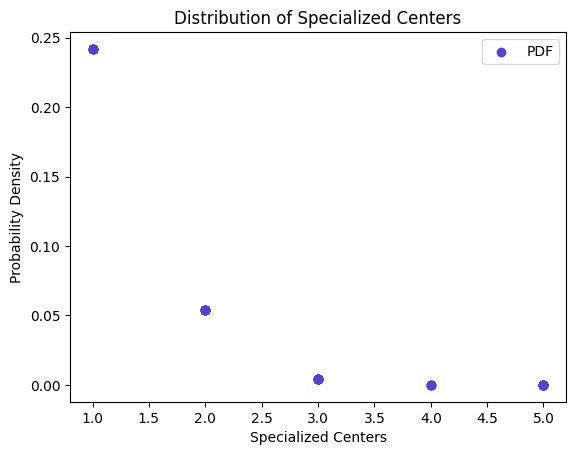

In [10]:
pdf = stats.norm.pdf(spcCent, loc=0, scale=1)
plt.scatter(spcCent, pdf, color='#5743c8')
plt.title('Distribution of Specialized Centers')
plt.xlabel('Specialized Centers')
plt.ylabel('Probability Density')
plt.legend(['PDF'])
plt.show()

In [ ]:
def plot_generator(column_, title, xlabel='Date', ylabel='Value', kind='bar'):
    column_.plot(kind=kind, figsize=(10, 5), title=title, xlabel=xlabel, ylabel=ylabel)

    # Save plot to a BytesIO object
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close() # Close the plot to free memory

    # Encode the image to base64
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return image_base64

plot_generator(df["Specialized Centers"], 'Specialized Centers Over Time', xlabel='Time', ylabel='Centers')

iVBORw0KGgoAAAANSUhEUgAAA+gAAAH0CAYAAACuKActAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAATKhJREFUeJzt3XlYVOX///H3sKMsooDiBu6Gu6TmlmYYqblVmn5yrcw9ybKkMrUybfPTbum3LNu0XFo+ZeZuppbiXpqKouSCW4KAosL794cX83MEZJBx5gafj+ua62LOOXPP+x4Oh3ndZ7OoqgoAAAAAAHApN1cXAAAAAAAACOgAAAAAABiBgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAAAAABiAgA4AAAAAgAEI6AAAAAAAGICADgAAAACAAQjoAAAAAAAYgIAOAAAAAIABCOgAAONZLBaZNGlSoV+3atUqsVgssmrVKuu0QYMGSUREhMNqs0diYqJYLBb55JNPnPq+MN8nn3wiFotFEhMTXV0KAMAABHQAgOzYsUPuv/9+CQ8PFx8fH6lUqZJ07NhR3nnnHVeXdlNKTk6WJ598UurWrSulSpWS0qVLS1RUlLz00kty5syZG/a+GRkZMmnSJJsBDZP8+eef0q9fP6lUqZJ4e3tLxYoV5cEHH5Q///zT1aXZaN++vVgslgIf1zPo

In [37]:
avgData = pd.read_csv('/home/aniket-yadav/WORKSPACE/WebProjects/.visenv/Visualizer/staticfiles/Data/AvgAllTypeCancer.csv').reset_index()

avgData.columns

Index(['index', 'Type', 'Country', 'SEdPc_Avg', 'InfraAvg', 'Clinical_Avg',
       'Biomark_Avg', 'Treatment_Avg'],
      dtype='object')

In [27]:
avgData = avgData[avgData['Type'] == "Prostate"].set_index('Country')
avgData.drop(['Type', 'Treatment_Avg'], axis=1)

,SEdPc_Avg,InfraAvg,Clinical_Avg,Biomark_Avg
Country,,,,
South Africa,2.3,3.0,3.0,1.6
Kenya,1.0,1.5,1.6,0.8
Nigeria,1.0,1.5,1.6,0.8
Egypt,2.0,2.5,2.6,1.4
Morocco,2.0,2.5,1.6,1.2
Algeria,2.0,2.0,1.6,1.2
Ethiopia,1.0,1.0,1.0,0.5
India,3.0,3.0,2.6,1.1
Japan,4.7,5.0,3.2,0.8


In [43]:
def DataSet_to_JSON_Avg(df, cancer_type):
    data = df[df['Type'] == cancer_type.title()].set_index('Country')
    data = data.drop(['index', 'Type'], axis=1)
    chart_data = []
    for col in data.columns:
        dict_data = {
            col: data[col].to_list()
        }
        chart_data.append(dict_data)
    return json.dumps(chart_data)

DataSet_to_JSON_Avg(avgData, 'prostate')


'[{"SEdPc_Avg": [2.3, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 4.7, 4.3, 3.0, 2.0, 5.0, 5.0, 5.0, 4.3, 5.0, 5.0, 4.3, 4.3, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 5.0, 5.0, 4.3, 3.7, 3.0, 1.0, 1.0, 2.3, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 3.7, 2.7]}, {"InfraAvg": [3.0, 1.5, 1.5, 2.5, 2.5, 2.0, 1.0, 3.0, 5.0, 5.0, 3.5, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.5, 4.5, 3.5, 3.0, 3.0, 3.0, 3.0, 2.5, 5.0, 5.0, 5.0, 4.0, 3.5, 1.0, 1.0, 3.0, 4.0, 4.0, 1.0, 2.0, 2.5, 2.5, 4.0, 2.5]}, {"Clinical_Avg": [3.0, 1.6, 1.6, 2.6, 1.6, 1.6, 1.0, 2.6, 3.2, 3.4, 2.6, 2.6, 4.4, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 3.6, 2.8, 3.6, 3.6, 3.6, 2.8, 4.6, 4.6, 4.6, 4.6, 3.6, 1.0, 1.0, 3.6, 3.6, 3.6, 1.0, 2.6, 2.6, 2.6, 3.0, 2.6]}, {"Biomark_Avg": [1.6, 0.8, 0.8, 1.4, 1.2, 1.2, 0.5, 1.1, 0.8, 1.0, 0.9, 1.4, 2.1, 2.6, 3.0, 2.8, 3.0, 3.0, 2.8, 2.6, 2.3, 1.7, 1.9, 1.7, 1.7, 1.6, 2.8, 2.6, 2.8, 2.8, 2.3, 0.4, 0.5, 1.7, 1.7, 1.9, 0.8, 1.5, 0.8, 1.5, 2.1, 2.7]}, {"Treatment_Avg": [3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 4.3, 4.3, 3.0, 2.3, 4.7, 4.

In [12]:
cancer_type = 'prostate'

avgData = avgData[avgData['Type'] == cancer_type.title()]
avgDataTransposed = avgData.iloc[:,1:].set_index('Country').transpose()
get_descriptive_statistics(avgDataTransposed, alter=0).transpose()


,mean,median,std,variance,min,max,skew,kurtosis,coefficient of variation,75th percentile,50th percentile,25th percentile,interquartile range
Malaysia,2.64,2.7,0.080,0.006,2.5,2.7,-0.844,-0.922,0.030,2.7,2.7,2.6,0.1
South Africa,2.58,3.0,0.560,0.314,1.6,3.0,-0.844,-0.922,0.217,3.0,3.0,2.3,0.7
Kenya,1.18,1.0,0.312,0.098,0.8,1.6,0.264,-1.645,0.265,1.5,1.0,1.0,0.5
Nigeria,1.18,1.0,0.312,0.098,0.8,1.6,0.264,-1.645,0.265,1.5,1.0,1.0,0.5
Egypt,2.10,2.0,0.429,0.184,1.4,2.6,-0.395,-1.060,0.204,2.5,2.0,2.0,0.5
Morocco,1.86,2.0,0.436,0.190,1.2,2.5,-0.090,-0.998,0.235,2.0,2.0,1.6,0.4
Algeria,1.76,2.0,0.320,0.102,1.2,2.0,-0.844,-0.922,0.182,2.0,2.0,1.6,0.4
Ethiopia,0.90,1.0,0.200,0.040,0.5,1.0,-1.500,0.250,0.222,1.0,1.0,1.0,0.0
India,2.54,3.0,0.736,0.542,1.1,3.0,-1.349,0.014,0.290,3.0,3.0,2.6,0.4
Japan,3.60,4.3,1.527,2.332,0.8,5.0,-0.988,-0.535,0.424,4.7,4.3,3.2,1.5


In [26]:
ddata = []
for col_name in avgData.columns:
    if col_name not in ["Type", "Country"]:
        print(col_name)
        ddata.append(avgData[col_name].to_list())
        
print(ddata)
stats.f_oneway(ddata[0], ddata[1], ddata[2], ddata[3], ddata[4])

SEdPc_Avg
InfraAvg
Clinical_Avg
Biomark_Avg
Treatment_Avg
[[2.3, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 4.7, 4.3, 3.0, 2.0, 5.0, 5.0, 5.0, 4.3, 5.0, 5.0, 4.3, 4.3, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 5.0, 5.0, 4.3, 3.7, 3.0, 1.0, 1.0, 2.3, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 3.7, 2.7], [3.0, 1.5, 1.5, 2.5, 2.5, 2.0, 1.0, 3.0, 5.0, 5.0, 3.5, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.5, 4.5, 3.5, 3.0, 3.0, 3.0, 3.0, 2.5, 5.0, 5.0, 5.0, 4.0, 3.5, 1.0, 1.0, 3.0, 4.0, 4.0, 1.0, 2.0, 2.5, 2.5, 4.0, 2.5], [3.0, 1.6, 1.6, 2.6, 1.6, 1.6, 1.0, 2.6, 3.2, 3.4, 2.6, 2.6, 4.4, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 3.6, 2.8, 3.6, 3.6, 3.6, 2.8, 4.6, 4.6, 4.6, 4.6, 3.6, 1.0, 1.0, 3.6, 3.6, 3.6, 1.0, 2.6, 2.6, 2.6, 3.0, 2.6], [1.6, 0.8, 0.8, 1.4, 1.2, 1.2, 0.5, 1.1, 0.8, 1.0, 0.9, 1.4, 2.1, 2.6, 3.0, 2.8, 3.0, 3.0, 2.8, 2.6, 2.3, 1.7, 1.9, 1.7, 1.7, 1.6, 2.8, 2.6, 2.8, 2.8, 2.3, 0.4, 0.5, 1.7, 1.7, 1.9, 0.8, 1.5, 0.8, 1.5, 2.1, 2.7], [3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 3.0, 4.3, 4.3, 3.0, 2.3, 4.7, 4.7, 5.0, 4.0, 5.0, 5.0, 4.

F_onewayResult(statistic=np.float64(11.437049691069205), pvalue=np.float64(2.1250919809902798e-08))